In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
# Data Set
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()

raw_data_frame = pd.DataFrame(raw_data['data'], columns = raw_data['feature_names'])

print(raw_data_frame.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


The variable we’re trying to predict - which is whether or not a specific breast cancer tumor is malignant or benign - is held within the raw_data object under the target key. 

The target values can be accessed with **raw_data['target']**. The values will be 1 for malignant tumors and 0 for benign tumors.

In [3]:
# Performing our first Principal Componenet Transformation

# We need to first standardize our data set => act of transforming all of the observations in our data set so that each feature is roughly the same size
# We use scikit-learn's StandardScaler class to do this
from sklearn.preprocessing import StandardScaler

# Create instance of this class
data_scaler = StandardScaler()

# Train the variable on our data set
data_scaler.fit(raw_data_frame)

# Call the transform method on our data_scaler object to create a new data set where the new observations have been standardized
scaled_data_frame = data_scaler.transform(raw_data_frame)


In [4]:
# Perform our PCA transformation
from sklearn.decomposition import PCA

# Create instance of this PCA class
# n_components implies the number of principal components
pca = PCA(n_components = 2)

# Fit pca model on scaled_data_frame
pca.fit(scaled_data_frame)

# PCA in action
x_pca = pca.transform(scaled_data_frame)
print(x_pca.shape)
print(scaled_data_frame.shape)

(569, 2)
(569, 30)


We see that we have reduced our original data set with 30 features to a more simple model with 2 features.

In [5]:
# Visualizing our PCA

Text(0, 0.5, 'Second Principal component')

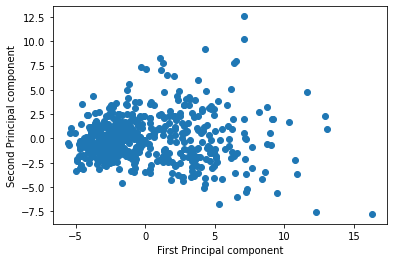

In [6]:
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')

This visualization shows each data point as a function of its first and second principal components.

Text(0, 0.5, 'Second Principal Component')

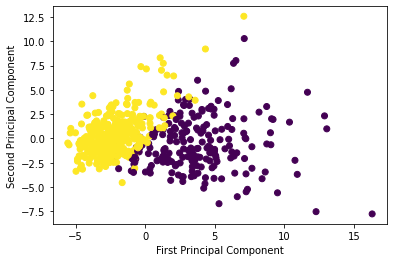

In [7]:
plt.scatter(x_pca[:,0],x_pca[:,1], c=raw_data['target'])

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

As you can see, using just 2 principal components allows us to accurately divide the data set based on malignant and benign tumors.

Said differently, we have maintained our ability to make accurate predictions on the data set but have dramatically increased its simplicity by reducing the number of features from 30 in the original data set to 2 principal components now.

**Principal components are linear combinations of the original features within a data set. In other words, a principal component is calculated by adding and subtracting the original features of the data set.**

In [8]:
# Generate the coefficients of these linear combination
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


principal component analysis _must _be combined with classification models (like logistic regression or k nearest neighbors) to make meaningful predictions.